# GTI771 - Apprentissage machine avancé
## Département de génie logiciel et des technologies de l’information



## Laboratoire 4 - Réduction de la dimensionnalité de primitives « deep »
#### <font color=black> Version 2 - Été 2024 </font>

##### <font color=grey> Version 1 - Prof. Alessandro L. Koerich.
##### Version 2 - Chargé de lab. Arthur Josi

| NOMS                  | CODE PERMANENT                                   |
|-----------------------|--------------------------------------------------|
| Hugo Rhéaume-Simard   | RHEH93080004                                     |
| Laurent Marleau-Gallant             |  MARL05109800                                            |
| Yulia Bakaleinik             | BAKY30539705                                            |

## Introduction
Les primitives générées par les CNNs peuvent avoir une haute dimensionnalité, des éléments nuls, ainsi que des redondances. En fonction du type sortie choisie (global pooling, flattening, etc.), la dimensionnalité  des vecteurs de primitives en sortie d'un CNNs peut facilement atteindre plusieurs milliers.

Dans ce laboratoire, nous allons explorer les algorithmes de réduction de la dimensionnalité sur les vecteurs de primitives générés par des CNNs préentraînés réutilisés comme extracteurs de primitives dans le Laboratoire 3. Pour ce faire, nous allons réduire la dimensionnalité des vecteurs « deep » et réentraîner les arbres de décision du Laboratoire 3.

L’évaluation de ce laboratoire sera basée sur:
- l'utilisation correcte des algorithmes;
- les réponses aux questions de ce notebook;
- l'organisation de votre code source (SVP, n'oubliez pas de mettre des commentaires dans le code source!)

# Modules et bibliotèques python

### Import de bibliotèques

###  <font color=blue> À faire: </font>
1. Ajouter les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [2]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library

### Définition des fonctions

In [3]:
def fa():
    return 1

# Partie 1 - Ensemble de données

Point de départ: *fer2013-clean-deep.csv* ou *fer2013-clean-pre-deep.csv*

## 1a: Charger le fichier de primitives « deep » du laboratoire 3.

###  <font color=blue> À faire: </font>
1. Reprenez votre ensemble de données nettoyé et composé des vecteurs de primitives obtenus dans le laboratoire 3 via la meilleure approche parmis les deux evaluées. Repérez les trois partitions de données: apprentissage, validation et test.

In [4]:
# Load data - Au choix:

# ferData = np.loadtxt( 'fer2013-clean.csv', delimiter=',', dtype=str )
ferData = np.loadtxt( 'content/fer2013-clean-pre.csv', delimiter=',', dtype=str )

training_data = ferData[ferData[:, 2] == 'Training']
validation_data = ferData[ferData[:, 2] == 'PublicTest']
test_data = ferData[ferData[:, 2] == 'PrivateTest']

def transform_str_float(d):
    return np.array([np.fromstring(row, sep=' ', dtype=float) for row in d])

# Training set
Xtrain = transform_str_float(training_data[:, 1])
ytrain = np.array(training_data[:,0], dtype=np.float32)

# Validation set
Xval = transform_str_float(validation_data[:, 1])
yval = np.array(validation_data[:,0], dtype=np.float32)

# # Test set
Xtest = transform_str_float(test_data[:, 1])
ytest = np.array(test_data[:,0], dtype=np.float32)

print(Xtrain.shape, Xval.shape, Xtest.shape)

(28657, 2304) (3582, 2304) (3580, 2304)


In [32]:
import pickle
#  Ici on voudrait recevoir les images du fichier CSV des modeles deep
file = open("content/Xtrain_scaled2_1.pkl",'rb')
Xtrain_scaled2= pickle.load(file)
file.close()


file = open("content/Xval_scaled2.pkl",'rb')
Xval_scaled2= pickle.load(file)
file.close()

file = open("content/Xtest_scaled2.pkl",'rb')
Xtest_scaled2= pickle.load(file)
file.close()



In [33]:
print (Xtrain_scaled2.shape)
print (Xval_scaled2.shape)
print (Xtest_scaled2.shape)


(28657, 50176)
(3582, 50176)
(3580, 50176)


# Partie 2: Réduction de la dimensionnalité

Bibliothèques Python pour la reduction de la dimensionnalité :

* [Transformation algorithms](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Feature selection algorithms](https://scikit-learn.org/stable/modules/feature_selection.html)

###  <font color=blue> À faire: </font>
1. Choisir un algorithme de `transformation` de primitives et un algorithme de `sélection` des primitives pour réduire la dimensionnalité de vos vecteurs de primitives « deep » pour lesquels vous avez obtenus les meilleurs résultats au laboratoire précédent.
2. Expliquer brièvement les algorithmes et surtout les hyperparamètres qui influencent la réduction de la dimensionnalité, et préciser la dimensionalité attendue des vecteurs de primitives réduits.
3. Utiliser [T-SNE](https://learnopencv.com/t-sne-for-feature-visualization/) ou [UMAP](https://umap-learn.readthedocs.io/en/latest/plotting.html) comme outils de visualisation des vecteurs de primitives de la base de test (pour des fins de comparaison).
4. Générer vos vecteurs « deep » réduits avec ces algorithmes pour l'ensemble de données FER (apprentissage, validation et test).
5. Utiliser le même outil de visualisation que pour la question 3 sur les vecteurs "deep" réduits puis commenter.
6. Sauvegardez vos vecteurs réduits sous la forme d'un fichier 'csv' (p. ex. *fer2013-clean-deepVGG19-chi2.csv* ou *fer2013-clean-pre-deepVGG19-chi2.csv*). Vous n'êtes pas obligé d'utiliser la même structure du fichier original *fer2013.csv*, mais vous devez garder la correspondance (ligne du fichier original et du vecteur de primitives). Vous devez nommer vos fichiers de primitive « deep » réduits en référence au CNN utilisé et à l'algorithme de réduction de la dimensionnalité utilisé, p. ex., *fer2013-clean-deepVGG19-chi2.csv* pour un vecteur CNN VGG19 réduit avec chi2.

#### Résultats et réponses

Vos réponses et résultats ici:

#### Code

In [48]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Votre code ici

## 1. Utiliser PCA pour la transformation des données 
    # Utiliser un SVD_solver = 'randomized' pour la PCA

pca = PCA(n_components=500, svd_solver='randomized')
Xtrain_pca = pca.fit_transform(Xtrain_scaled2)
Xval_pca = pca.transform(Xval_scaled2)
Xtest_pca = pca.transform(Xtest_scaled2)

pca1000 = PCA(n_components=1000, svd_solver='randomized')
Xtrain_pca1000 = pca1000.fit_transform(Xtrain_scaled2)
Xval_pca1000 = pca1000.transform(Xval_scaled2)
Xtest_pca1000 = pca1000.transform(Xtest_scaled2)



print(Xtrain_pca.shape)
print(Xval_pca.shape)
print(Xtest_pca.shape)






(28657, 500)
(3582, 500)
(3580, 500)


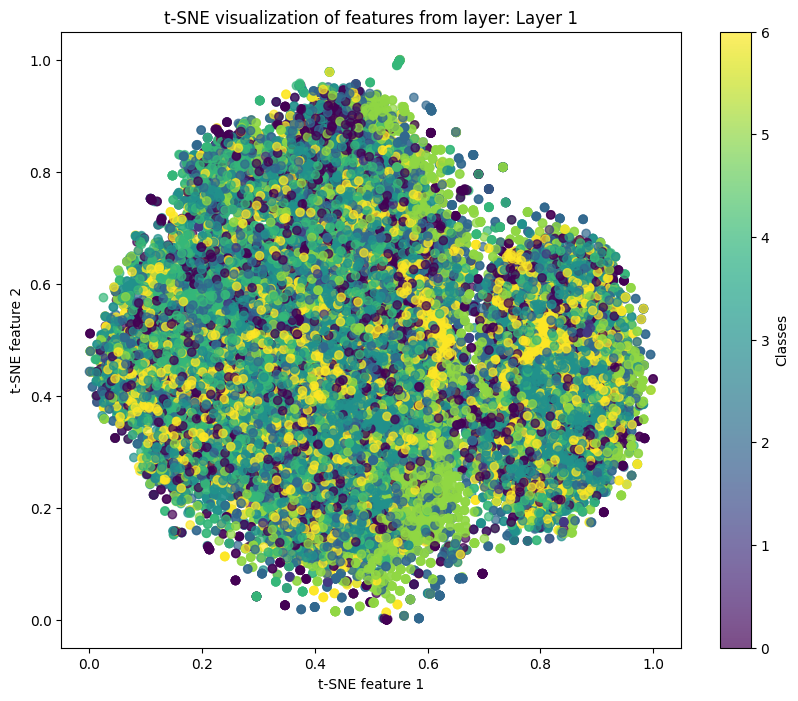

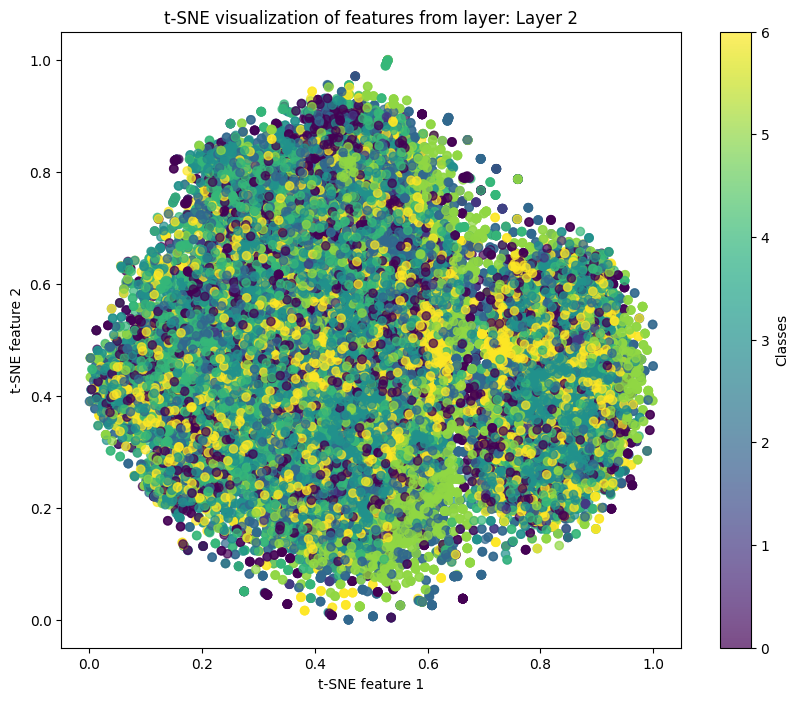

In [59]:
# Visualiser avec TSNE  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def scale_to_01_range(x):
    """Scale the input array to range [0, 1]."""
    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

def plot_tsne(X, y, layer_name):
    """Perform t-SNE and plot the results."""
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Scale the t-SNE results to [0, 1] range
    tx = scale_to_01_range(X_tsne[:, 0])
    ty = scale_to_01_range(X_tsne[:, 1])

    # Plotting the results
    plt.figure(figsize=(15, 15))
    scatter = plt.scatter(tx, ty, c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Classes')
    plt.title(f't-SNE visualization of features from layer: {layer_name}')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.show()

# Example usage with your data
X_train_features_flat1 = Xtrain_pca.reshape(Xtrain_pca.shape[0], -1)
plot_tsne(X_train_features_flat1[:], ytrain[:], layer_name='Layer 1')

X_train_features_flat2 = Xtrain_pca1000.reshape(Xtrain_pca1000.shape[0], -1)
plot_tsne(X_train_features_flat2[:], ytrain[:], layer_name='Layer 2')


In [35]:
## 2. Utiliser un algo de selection de modèle pour trouver le meilleur modèle

# Initialize and train the model with a fixed random state
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain_pca, ytrain)

# Predict and evaluate
predictions = model.predict(Xtest_pca)
accuracy = (predictions == ytest).mean()
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.47


In [36]:

pred2 = model.predict(Xval_pca)
accuracy2 = (pred2 == yval).mean()
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 0.48


(28657, 107)
Accuracy: 0.54


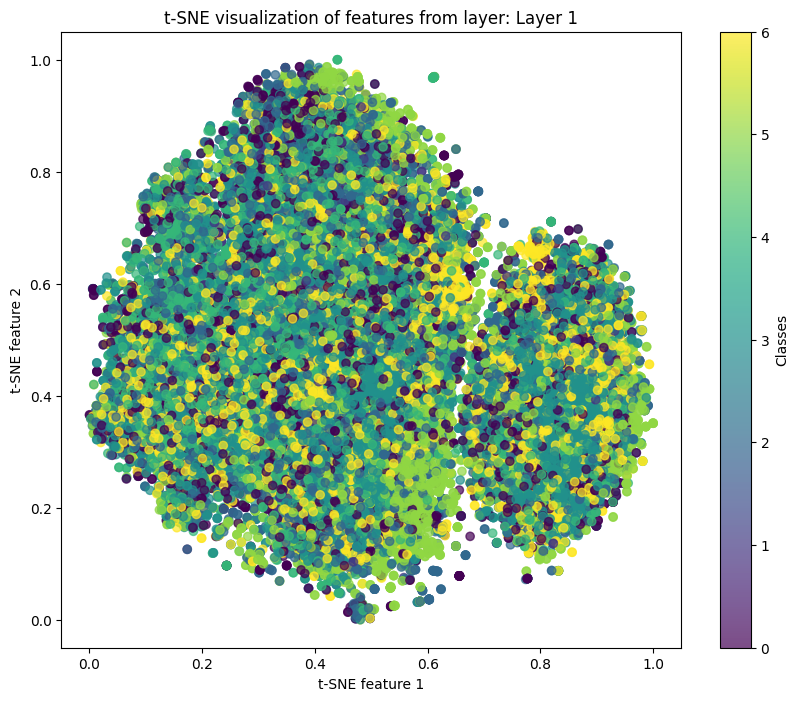

In [60]:
# 3. Utiliser TSNE pour visualiser les données en 2D
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.76))
sel.fit_transform(Xtrain_pca)

features = sel.get_support(indices=True)
#print(features)
selected_indices = [i for i, selected in enumerate(features) if selected]

X_selected_train = sel.transform(Xtrain_pca)


print(X_selected_train.shape)

model = RandomForestClassifier(random_state=42)
model.fit(X_selected_train, ytrain)

Xtest_selected = sel.transform(Xtest_pca)

# Predict and evaluate
predictions = model.predict(Xtest_selected)
accuracy = (predictions == ytest).mean()
print(f"Accuracy: {accuracy:.2f}")

plot_tsne(X_selected_train[:], ytrain[:], layer_name='Layer 1')



In [85]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np


# Define a list of C values to test
C_values = [0.00047, 0.00049]

X_train_pca = Xtrain_pca
y_train = ytrain

X_test_pca = Xtest_pca
y_test = ytest

X_val_pca = Xval_pca
y_val = yval

for C in C_values:
    # Train LinearSVC with current C value
    lsvc = LinearSVC(C=C, penalty="l1", dual=False).fit(X_train_pca, y_train)
    
    # Select features using SelectFromModel
    model = SelectFromModel(lsvc, prefit=True)
    X_train_new = model.transform(X_train_pca)
    X_test_new = model.transform(X_test_pca)
    
    # Train RandomForestClassifier on selected features
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_new, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test_new)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"For C={C}, Accuracy: {accuracy:.6f}")




For C=0.00047, Accuracy: 0.542179
For C=0.00049, Accuracy: 0.548324


In [115]:
lsvc = LinearSVC(C=0.00048, penalty="l1", dual=False).fit(X_train_pca, y_train)
model = SelectFromModel(lsvc, prefit=True)

X_train_new = model.transform(X_train_pca)
X_test_new = model.transform(X_test_pca)
X_val_new = model.transform(X_val_pca)

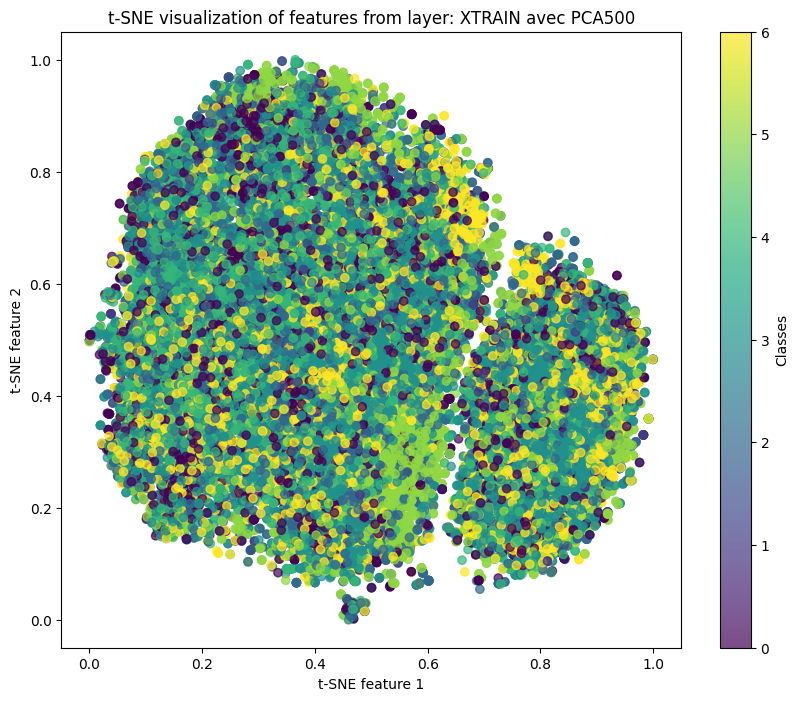

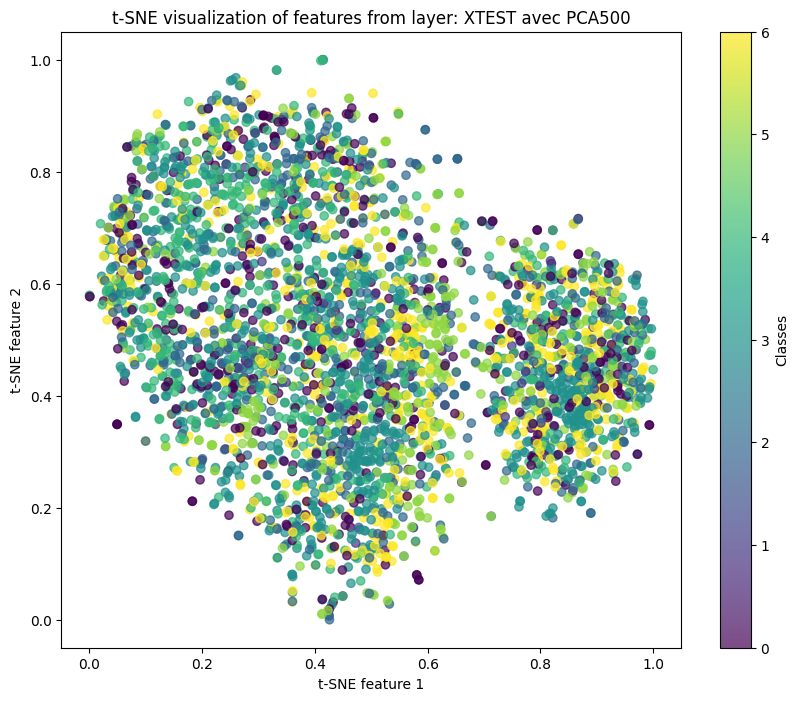

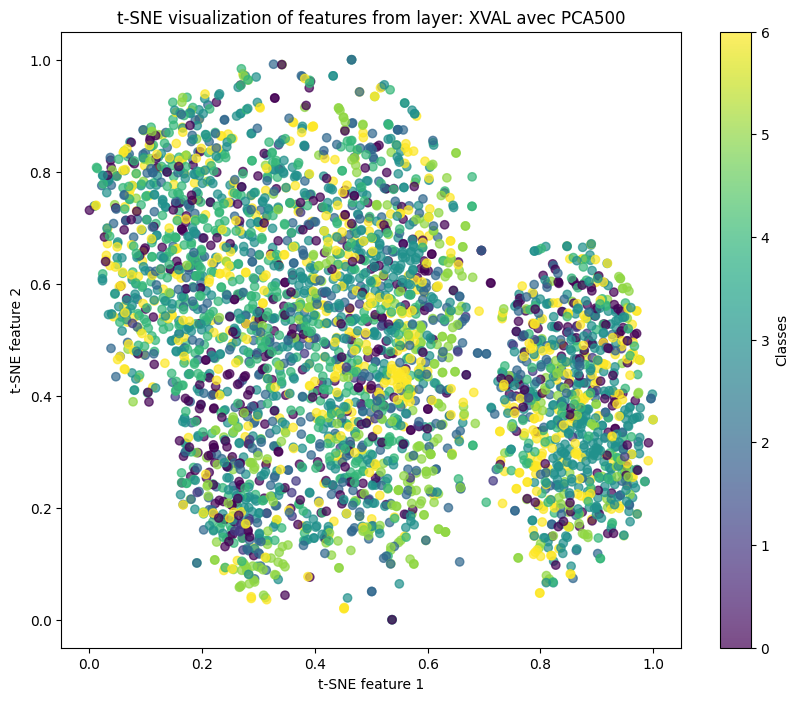

In [89]:
plot_tsne(X_train_new[:], ytrain[:], layer_name='XTRAIN avec PCA500')
plot_tsne(X_test_pca[:], ytest[:], layer_name='XTEST avec PCA500')
plot_tsne(X_val_pca[:], yval[:], layer_name='XVAL avec PCA500')


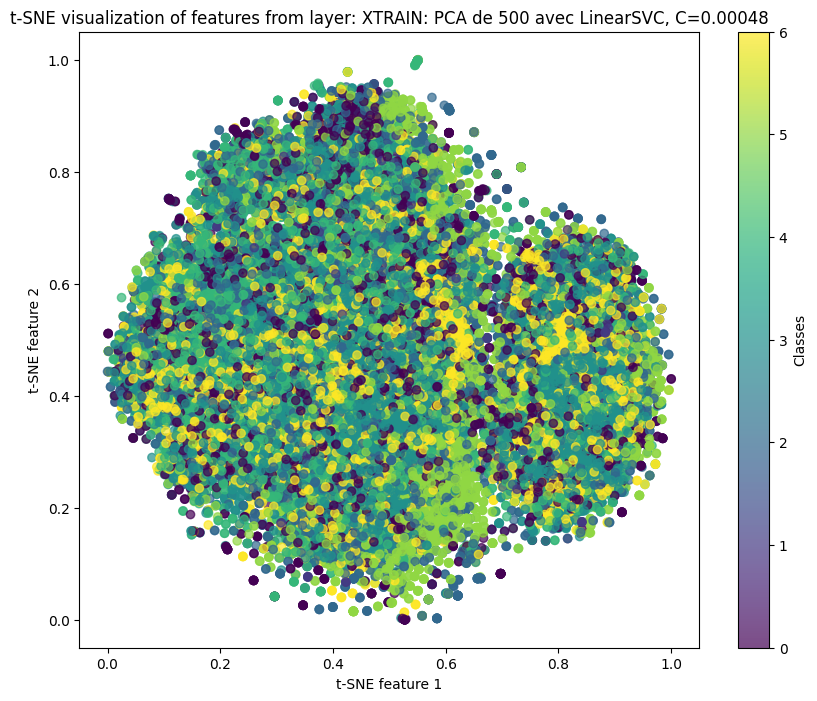

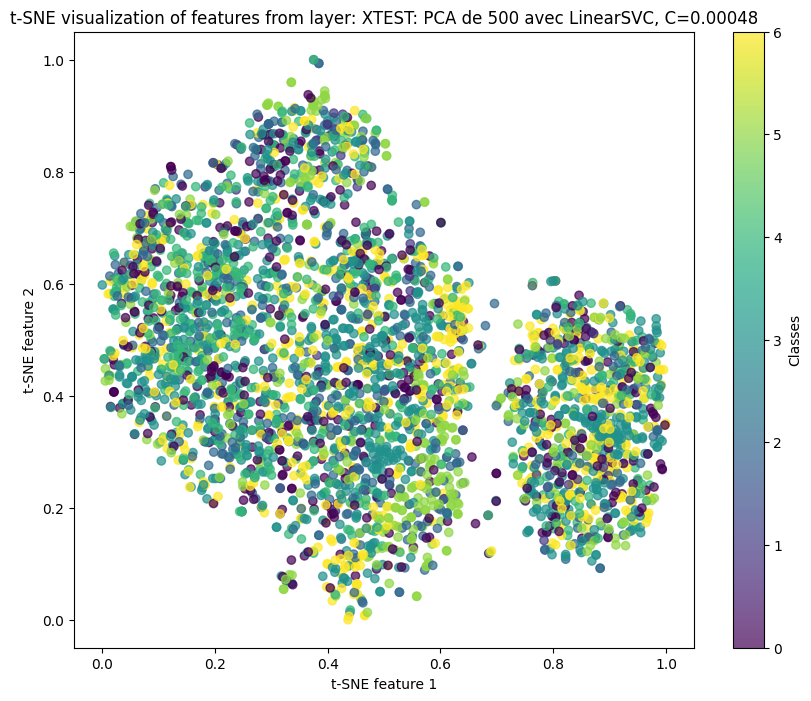

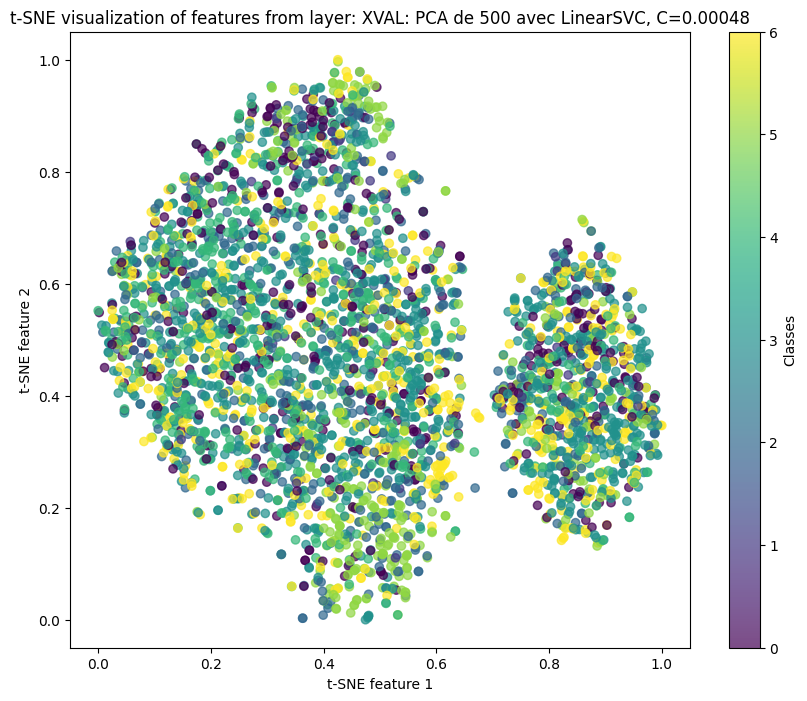

In [91]:


plot_tsne(X_train_pca[:], y_train[:], layer_name='XTRAIN: PCA de 500 avec LinearSVC, C=0.00048')
plot_tsne(X_test_new[:], y_test[:], layer_name='XTEST: PCA de 500 avec LinearSVC, C=0.00048')
plot_tsne(X_val_new[:], y_val[:], layer_name='XVAL: PCA de 500 avec LinearSVC, C=0.00048') 


In [148]:

ferDataBack = ferData

def join_values(array, separator=' '):
    """
    Join the values of a numpy array into a string with a specified separator.

    Parameters:
        array (numpy.ndarray): The input array.
        separator (str, optional): The separator between values. Defaults to ' '.

    Returns:
        str: The string with joined values.
    """
    # Initialisation de la chaîne résultante
    string_result = ''

    # Ajouter chaque valeur du tableau à la chaîne résultante avec un espace comme séparateur
    for i, value in enumerate(array):
        # Formater la valeur pour avoir uniquement 5 chiffres après la virgule
        formatted_value = "{:.30f}".format(value)
        string_result += formatted_value
        # Ajouter le séparateur si ce n'est pas le dernier élément
        if i < len(array) - 1:
            string_result += separator

    return string_result

print(X_train_new.shape)
print(X_train_new[1])

print(X_val_new.shape)

print(X_test_new.shape)

ferDataBack = ferData

for i in range (0, X_train_new.shape[0]):
    data = X_train_new[i].astype(np.float32)
    result = join_values(data ,separator=' ')
    ferDataBack[i+1, 1] = result
    

for i in range (0, X_val_new.shape[0]):
    data = X_val_new[i].astype(np.float32)
    result = join_values(data ,separator=' ')
    ferDataBack[i+1+X_train_pca.shape[0] , 1] = result

for i in range (0, X_test_new.shape[0]):
    data = X_test_new[i].astype(np.float32)
    result = join_values(data ,separator=' ')
    ferDataBack[i+1+X_train_pca.shape[0]+X_val_pca.shape[0] , 1] = result

    
np.savetxt('fer2013-clean-deepRestNet50V2-variance.csv', ferDataBack, delimiter=',', fmt='%s')


(28657, 55)
[-3.3880110e+00  5.5930667e+00 -6.9660658e-01  1.1349750e-01
 -5.5616245e+00  9.7361201e-01 -2.6865622e-01  1.5158299e+00
 -2.6035445e+00 -5.2805907e-01  1.3724484e+00 -2.7637410e+00
 -1.2508558e-01 -6.4667530e-02 -2.5731558e-01  6.7311299e-01
  5.2607641e-02  4.1425915e+00  6.9388676e-01  7.3880178e-01
 -2.8260150e+00 -3.6527762e-01 -4.5434019e-01  1.7992220e+00
 -1.7896369e+00 -2.9952133e-01 -9.7419657e-02  8.2286149e-01
 -6.6141498e-01  4.2203328e-01  2.0112362e+00 -9.8576739e-02
 -7.6053661e-01  1.9907271e+00  5.9359157e-01  7.1980447e-01
  1.9742970e+00  3.4765002e-01 -4.7977371e-03  4.4955647e-01
  1.4712212e+00  4.7350317e-01  8.4233630e-01  2.1202186e-01
  2.6718551e-01  1.6719203e+00  1.3168881e+00  9.3168157e-01
 -3.8506952e-01  9.3592906e-01  7.1684206e-01  1.1636202e+00
  2.3357475e+00 -1.0242674e+00 -9.0605628e-01]
(3582, 55)
(3580, 55)


In [149]:

training_data = ferData[ferData[:, 2] == 'Training']
validation_data = ferData[ferData[:, 2] == 'PublicTest']
test_data = ferData[ferData[:, 2] == 'PrivateTest']

print(training_data.shape, validation_data.shape, test_data.shape)

(28657, 3) (3582, 3) (3580, 3)


# Partie 3: Entraînement de modèles d'apprentissage machine

Vous êtes maintenant prêtes à entraîner / comparer différents modèles permettant la classification à partir des vecteurs de primitives « deep » réduits obtenus en partie 2.

###  <font color=blue> À faire: </font>
1.
  a) Comme pour les précédents laboratoires (2 et 3), entraîner et evaluer un [arbre de décision](https://scikit-learn.org/stable/modules/tree.html#tree-classification) de la bibliothèque `scikit-learn` en utilisant les vecteurs de primitives deep réduits via PCA. Utiliser un *grid search* avec deux hyperparamètres pour trouver les meilleures valeurs de ceux-ci.

  b) Évaluer  la performance de votre modèle sur les trois sets de données en affichant les taux de classification (dans le tableau en bas du notebook) et afficher entre autre la matrice de confusion sur la base de test.

2.
  a) Entrainer et évaluer de la même façon le modèle [quadratic discriminant analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)  (non linéaire). On utilisera un grid search avec les paramètres suivants:
```
param_grid = {
    'reg_param': [0.0, 0.01, 0.1, 1.0],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2]
}
```
  b) Commenter

3.
  a) Choisir, entraîner et évaluer un modèle linéaire tel que [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) ou une des variante de l'algorithme [naive bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) sur les vecteurs de primitives réduits, ou bien (**au choix**) entraîner et évaluer l'algorithme [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) sur les vecteurs non réduits obtenus   

  b) Commenter

4.
  a) Entraîner un modèles de classification [K-Nearest-Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (modèle non paramétrique) en faisant un grid_search sur deux hyperparamètres du modèle puis évaluer celui-ci.

  b) Commenter.

5. Comparez les différents résultats obtenus via les différents modèles utilisés en présentant vos considérations et conclusions sur les points suivants:

  a) La pertinence / avantages / désavantages d’utiliser la réduction de la dimensionnalité

  b) Impact sur la performances de l'arbre de décision entraîné dans ce lab par rapport à celui entraîné dans le lab précédent.

  c) Comment interprétez-vous les résultats de votre modèle le plus performant entre les différents modèles de classifications utilisés?



Question bonus: Utiliser la [décomposition du biais et de la variance](https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/) sur les modèles entraînés afin de mieux comprendre les modèles utilisés, le biais et la variance étant corrélés aux phénomènes de sous-entraînement et de sur-entraînement. On parle souvent du compromis biais-variance ("bias-variance tradeoff") lorsque l'on entraîne un modèle de classification (ou de regression), car on cherchera à trouver un juste equilibre entre le biais et la variance afin d'optimiser les performances.


#### Code

In [ ]:
# Votre code ici

#1 Entrainement avec decision tree







In [ ]:
#2 Entrainement avec QDA




In [ ]:
#3 Entrainement avec LDA



In [ ]:

#4 Entrainement avec KNN

#### Vos résultats ici:

Taux de bonnes classification (%) - Ajuster les titres selon vos modèles

| Ensemble | modèle TM   |  AD+LBP Global  | AD+LBP Local  | modèle deep 1 + arbre | modèle deep 2 - arbre | modèle deep 1 + PCA + arbre | modèle deep 1 + PCA + QDA | modèle deep 1 + LDA  | modèle deep 1 + PCA + KNN |
|----------|-------------|-----------------|---------------|---------------|---------------|----------|-------------|-----------------|---------------|
| App | 99,67 |  |  |  |  |  |  |  |  | |
| Val      | 89,77       |  |  |  |  |  |  |  |  | |
| Test     | 77,99       |  |  |  |  |  |  |  |  | |

# Fin